# Introduction to Deep Learning in Python
An introduction to deep learning in Python by [Dr. Yi-Xin Liu](http://www.yxliu.group) at Fudan University (lyx@fudan.edu.cn).  
This is a part of the course: *Road to Scientific Research: Powerful Computer Applications* (XDSY118019.01).  
Lecture date: 2025.10.16

## Introduction to Deep Learning

Video:

- [Deep Learning In 5 Minutes | What Is Deep Learning? | Deep Learning Explained Simply | Simplilearn](https://youtu.be/6M5VXKLf4D4) (length: 5:51)


## Fundamentals of Deep Learning

Videos:

- [3Blue1Brown - But what is a neural network? | Chapter 1, Deep learning](https://youtu.be/aircAruvnKk) (length: 19:13)
- [3Blue1Brown - Gradient descent, how neural networks learn | Chapter 2, Deep learning](https://youtu.be/IHZwWFHWa-w) (length: 21:00)
- [3Blue1Brown - What is backpropagation really doing? | Chapter 3, Deep learning](https://youtu.be/Ilg3gGewQ5U) (length: 13:54)
- [3Blue1Brown - Backpropagation calculus | Chapter 4, Deep learning](https://youtu.be/tIeHLnjs5U8) (length: 10:17)
- (Optional) [Why Neural Networks can learn (almost) anything](https://youtu.be/0QczhVg5HaI)

Book:

- [Neural Networks and Deep Learning by Michael Nielsen](http://neuralnetworksanddeeplearning.com/index.html)
- Ian Goodfellow, Yoshua Bengio, Aaron Courville. Deep Learning. MIT Press. 2017

## Deep Learning Experiments

Do the following experiments in [A neural network playgound](http://playground.tensorflow.org/):

- Choose `Gaussian` data, use `linear` activation function to train.
- Choose `Circle` data, use `linear` activation function to train. Does it succeed? How to obtain a sucessful training?
- Choose `Spiral` data, find a sucessful classification neural network model.


## Deep Learning with PyTorch

### Why PyTorch

PyTorch is currently the most popular deep learning framework not only in Python but all programming languages. See the overall trend for PyTorch and other competitors (TensorFlow, JAX, MxNet, Caffe2, MindSpore, etc.) [here](https://paperswithcode.com/trends).

### Introduction to PyTorch

Video:

- [Introduction to PyTorch](https://youtu.be/IC0_FRiX-sw) (length: 23:22)

Additional resources:

- [PyTorch Official Tutorial](https://pytorch.org/tutorials/)
- [PyTorch Beginner Series](https://youtube.com/playlist?list=PL_lsbAsL_o2CTlGHgMxNrKhzP97BaG9ZN) (8 videos)
- [Youtube: Learn PyTorch for deep learning in a day. Literally.](https://youtu.be/Z_ikDlimN6A)
- [Online Course: Learn PyTorch for Deep Learning: Zero to Mastery](https://www.learnpytorch.io/)

### A simple walkthrough

This tutorial is adapted from the [4th section](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html) of [Deep Learning with PyTorch: A 60 Minute Blitz](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html).


We will train an image classifier which can recognize objects in 10 classes from images. For this tutorial, we will use the CIFAR10 dataset. It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.

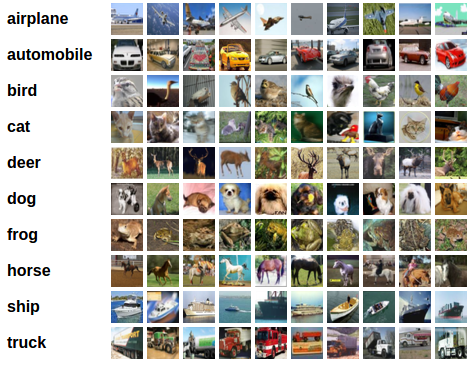

We will do the following steps in order:

- Load and normalize the CIFAR10 training and test datasets using torchvision
- Define a Convolutional Neural Network
- Define a loss function
- Train the network on the training data
- Test the network on the test data

#### Load and normalize CIFAR10

In [10]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
torch.__version__

'2.8.0'

In [11]:
import torchvision
import torchvision.transforms as transforms

In [12]:
import torch.nn as nn
import torch.nn.functional as F

In [13]:
import torch.optim as optim

In [14]:
transform = transforms.Compose(
    [transforms.ToTensor(),  # PILImage -> Tensor
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])  # [0,1] -> [-1,1]

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

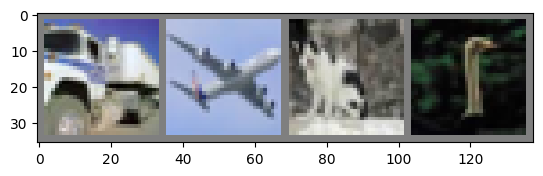

truck plane cat   bird 


In [15]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

#### Define a convolutional neural network

In [16]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
net

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

#### Define a loss function and optimizer

In [17]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

#### Train the network

In [18]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.176
[1,  4000] loss: 1.845
[1,  6000] loss: 1.660
[1,  8000] loss: 1.571
[1, 10000] loss: 1.498
[1, 12000] loss: 1.434
[2,  2000] loss: 1.373
[2,  4000] loss: 1.332
[2,  6000] loss: 1.321
[2,  8000] loss: 1.288
[2, 10000] loss: 1.280
[2, 12000] loss: 1.267
Finished Training


#### Test the network on the test data

In [19]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

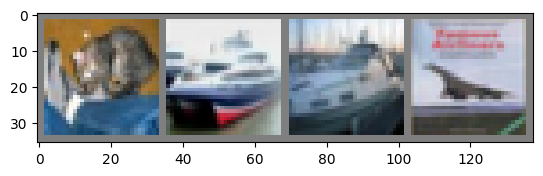

GroundTruth:  cat   ship  ship  plane


In [20]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [21]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [22]:
outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   ship  ship  ship 


In [23]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 56 %


In [24]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 49.4 %
Accuracy for class: car   is 55.2 %
Accuracy for class: bird  is 45.6 %
Accuracy for class: cat   is 35.8 %
Accuracy for class: deer  is 42.3 %
Accuracy for class: dog   is 69.1 %
Accuracy for class: frog  is 57.6 %
Accuracy for class: horse is 58.3 %
Accuracy for class: ship  is 71.2 %
Accuracy for class: truck is 75.7 %
